## Importing the Dependencies

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [23]:
df.shape

(4340, 8)

In [24]:
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


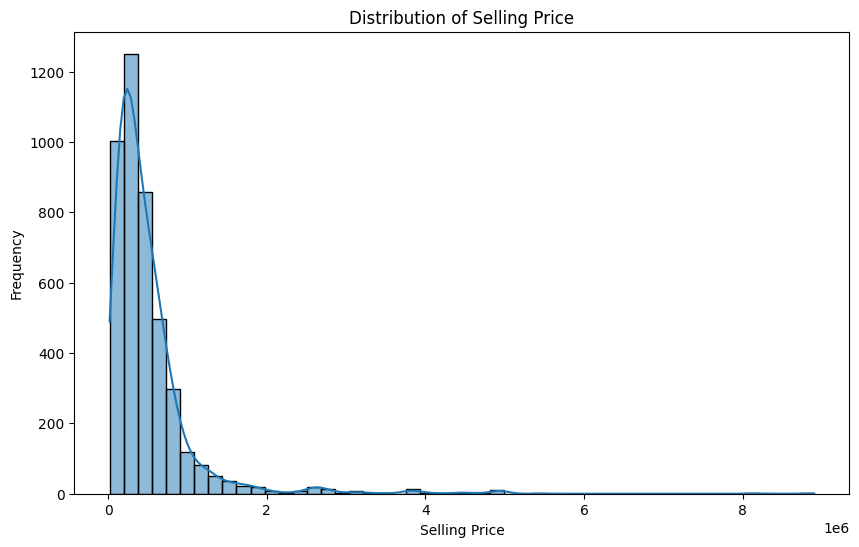

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of selling_price
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, bins=50)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

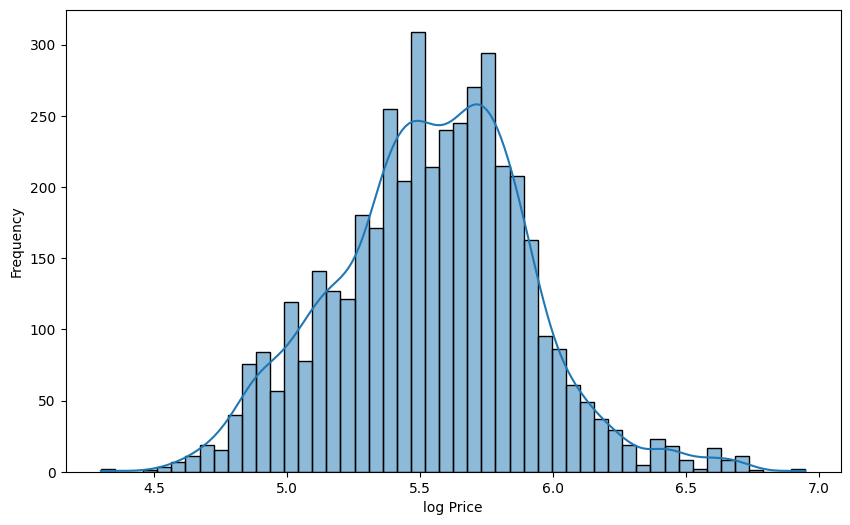

In [26]:
df['log_price'] = np.log10(df['selling_price'])
# Plot the distribution of log_price
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True, bins=50)
plt.xlabel('log Price')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Adding car_age feature
current_year = 2024
df["car_age"] = current_year - df["year"]
#df['brand'] = df['name'].str.split(' ').str[0]  # Extract brand from 'name'
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,log_price,car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,4.778151,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,5.130334,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,5.778151,12
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,5.397940,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,5.653213,10


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['owner'] = le.fit_transform(df['owner'])
df['transmission'] = le.fit_transform(df['transmission'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['fuel'] = le.fit_transform(df['fuel'])
#df['brand'] = le.fit_transform(df['brand'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,log_price,car_age
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,4.778151,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,5.130334,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,5.778151,12
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,5.397940,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,5.653213,10


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler,PolynomialFeatures
# Select numeric columns to normalize
numeric_columns = [ "km_driven"]

scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df_normalized.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,log_price,car_age
0,Maruti 800 AC,2007,60000,0.081139,4,1,1,0,4.778151,17
1,Maruti Wagon R LXI Minor,2007,135000,-0.347689,4,1,1,0,5.130334,17
2,Hyundai Verna 1.6 SX,2012,600000,0.724381,1,1,1,0,5.778151,12
3,Datsun RediGO T Option,2017,250000,-0.433455,4,1,1,0,5.397940,7
4,Honda Amaze VX i-DTEC,2014,450000,1.603479,1,1,1,2,5.653213,10


In [30]:
x = df_normalized.drop(columns = ['selling_price', 'name', 'year', 'log_price'])
y = df_normalized['log_price']
x.head()


,km_driven,fuel,seller_type,transmission,owner,car_age
0,0.081139,4,1,1,0,17
1,-0.347689,4,1,1,0,17
2,0.724381,1,1,1,0,12
3,-0.433455,4,1,1,0,7
4,1.603479,1,1,1,2,10


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [33]:
Y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)  # MSE as an evaluation metric
print(f"Mean Squared Error (MSE): {mse}")

mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

rmse = mse ** 0.5
r2 = r2_score(Y_test, Y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.04503171189781429
Mean Absolute Error (MAE): 0.16016160375415628
Root Mean Squared Error (RMSE): 0.21220676685208295
R-squared (R²): 0.6538014823152567


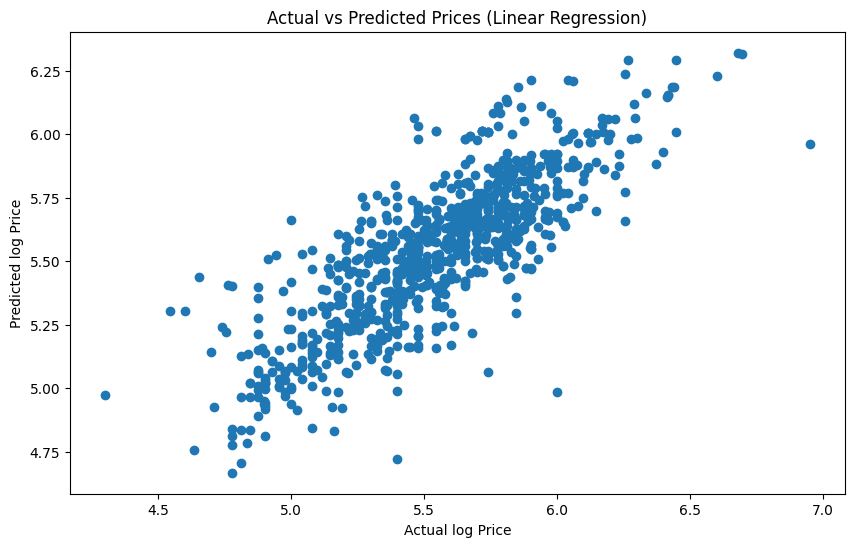

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual log Price')
plt.ylabel('Predicted log Price')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()

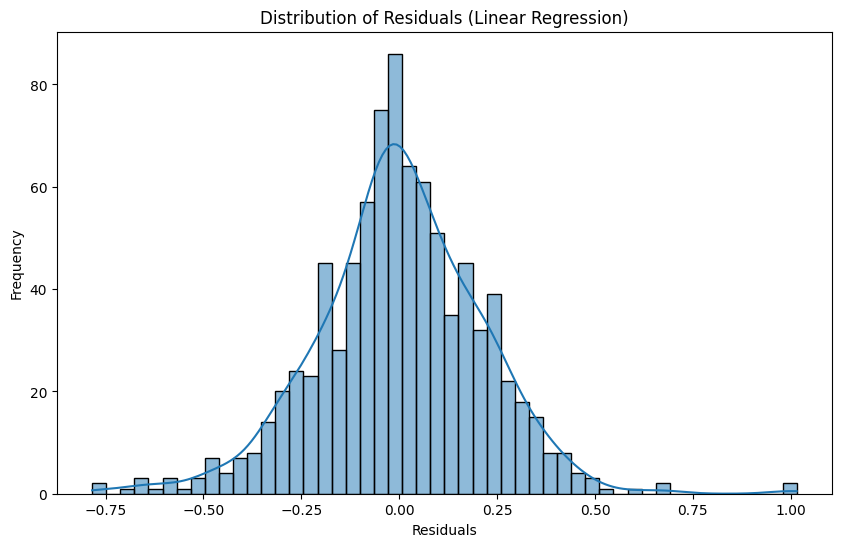

In [36]:
residuals = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title('Distribution of Residuals (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsRegressor
print("\nK-Nearest Neighbors:")
knn_reg = KNeighborsRegressor(n_neighbors=5)
model_knn=knn_reg.fit(X_train, Y_train)
y_pred_knn = knn_reg.predict(X_test)
mse_knn = mean_squared_error(Y_test, y_pred_knn)
r2_knn = r2_score(Y_test, y_pred_knn)
mae_knn = mean_absolute_error(Y_test, y_pred_knn)
print("accuracy for knn : ", knn_reg.score(X_test,Y_test))
print("score training data (K-Nearest Neighbors):", knn_reg.score(X_train, Y_train))
print("score testing data (K-Nearest Neighbors):", knn_reg.score(X_test, Y_test))
print("Mean Squared Error (KNN):", mse_knn)
print("R-squared (KNN):", r2_knn)
print("Mean Absolute Error (KNN):", mae_knn)


K-Nearest Neighbors:
accuracy for knn :  0.6417735977450101
score training data (K-Nearest Neighbors): 0.7694124975516016
score testing data (K-Nearest Neighbors): 0.6417735977450101
Mean Squared Error (KNN): 0.046596236888648425
R-squared (KNN): 0.6417735977450101
Mean Absolute Error (KNN): 0.1594358065311387


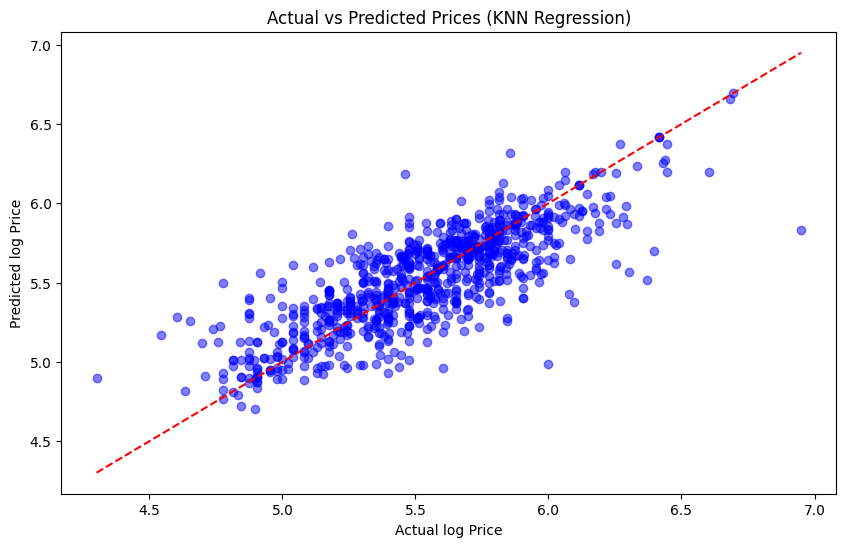

In [40]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_knn, alpha=0.5, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual log Price')
plt.ylabel('Predicted log Price')
plt.title('Actual vs Predicted Prices (KNN Regression)')
plt.show()